## Imports

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\vedan\Anaconda3\envs\ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

## Data

In [3]:
data = pd.read_csv('btc_hourly_data.csv')
data.head()

,Time,price,volume,label
0,2020-03-23 03:00:00 UTC,5989.014414,1.233530e+07,5945.645879
1,2020-03-23 04:00:00 UTC,5982.209648,1.469059e+07,5958.296062
2,2020-03-23 05:00:00 UTC,5945.645879,7.071329e+06,5938.628824
3,2020-03-23 06:00:00 UTC,5958.296062,8.727236e+06,5878.498745
4,2020-03-23 07:00:00 UTC,5938.628824,1.074222e+07,5846.105782


In [4]:
X = data.drop(columns=['Time', 'label'])
y = data['label']
X.head()

,price,volume
0,5989.014414,1.233530e+07
1,5982.209648,1.469059e+07
2,5945.645879,7.071329e+06
3,5958.296062,8.727236e+06
4,5938.628824,1.074222e+07


In [5]:
y.head()

0    5945.645879
1    5958.296062
2    5938.628824
3    5878.498745
4    5846.105782
Name: label, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

## RandomForest

### Raw Data

In [7]:
reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 4145.83156176138
MAE: 43.19895265877725


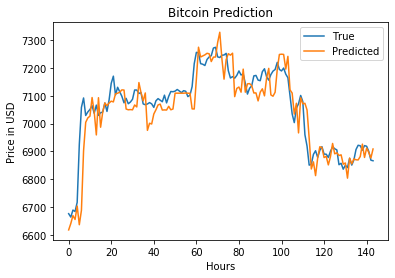

In [8]:
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

### Z-Score Normalized Data

In [9]:
normalized_data = data.drop(columns=['Time']).apply(zscore)
X = normalized_data.drop(columns=['label'])
y = normalized_data['label']
mean, std = data['label'].mean(), data['label'].std()
X.head()

,price,volume
0,-2.472875,-0.204294
1,-2.493139,-0.038549
2,-2.602027,-0.574726
3,-2.564355,-0.458197
4,-2.622924,-0.316400


MSE: 0.03739627966269758
MAE: 0.1303990653060238


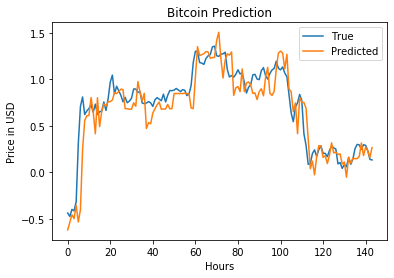

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

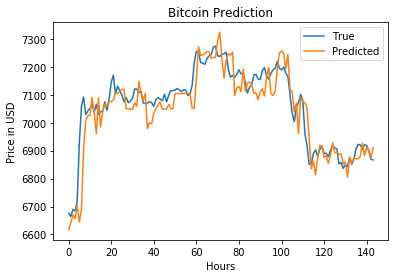

In [11]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

## Neural Networks

In [12]:
normalized_data = data.drop(columns=['Time']).apply(zscore)
X = normalized_data.drop(columns=['label'])
y = normalized_data['label']
mean, std = data['label'].mean(), data['label'].std()
X.head()

,price,volume
0,-2.472875,-0.204294
1,-2.493139,-0.038549
2,-2.602027,-0.574726
3,-2.564355,-0.458197
4,-2.622924,-0.316400


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

In [14]:
# !pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, LSTM
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.


In [15]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#train model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Train on 573 samples, validate on 144 samples
Epoch 1/50
573/573 [==============================] - 1s 2ms/step - loss: 1.7365 - val_loss: 0.7278
Epoch 2/50
573/573 [==============================] - 0s 156us/step - loss: 1.4714 - val_loss: 0.6846
Epoch 3/50
573/573 [==============================] - 0s 155us/step - loss: 1.2465 - val_loss: 0.6458
Epoch 4/50
573/573 [==============================] - 0s 181us/step - loss: 1.0286 - val_loss: 0.6027
Epoch 5/50
573/573 [==============================] - 0s 187us/step - loss: 0.8272 - val_loss: 0.5624
Epoch 6/50
573/573 [==============================] - 0s 160us/step - loss: 0.6445 - val_loss: 0.5053
Epoch 7/50
573/573 [==============================] - 0s 182us/step - loss: 0.4984 - val_loss: 0.4430
Epoch 8/50
573/573 [==============================] - 0s 173us/step - loss: 0.3749 - val_loss: 0.3732
Epoch 9/50
573/573 [==============================] - 0s 142us/step - loss: 0.2659 - val_loss: 0.2993
Epoch 10/50
573/573 [=================

MSE: 0.03373834926453226
MAE: 0.11507546090848747


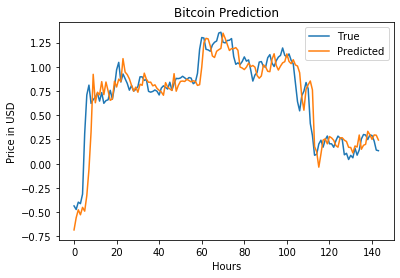

In [17]:

y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 3744.0387791038197
MAE: 38.33460570800634


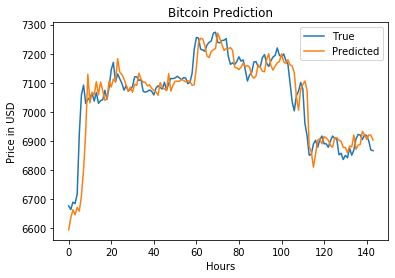

In [18]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [19]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test))

Train on 573 samples, validate on 144 samples
Epoch 1/100
573/573 [==============================] - 0s 707us/step - loss: 0.3207 - val_loss: 0.1188
Epoch 2/100
573/573 [==============================] - 0s 359us/step - loss: 0.0712 - val_loss: 0.0404
Epoch 3/100
573/573 [==============================] - 0s 288us/step - loss: 0.0637 - val_loss: 0.0335
Epoch 4/100
573/573 [==============================] - 0s 345us/step - loss: 0.0561 - val_loss: 0.0301
Epoch 5/100
573/573 [==============================] - 0s 361us/step - loss: 0.0488 - val_loss: 0.0314
Epoch 6/100
573/573 [==============================] - 0s 289us/step - loss: 0.0479 - val_loss: 0.0309
Epoch 7/100
573/573 [==============================] - 0s 328us/step - loss: 0.0480 - val_loss: 0.0312
Epoch 8/100
573/573 [==============================] - 0s 235us/step - loss: 0.0485 - val_loss: 0.0339
Epoch 9/100
573/573 [==============================] - 0s 174us/step - loss: 0.0483 - val_loss: 0.0282
Epoch 10/100
573/573 [=====

573/573 [==============================] - 0s 357us/step - loss: 0.0451 - val_loss: 0.0326
Epoch 80/100
573/573 [==============================] - 0s 240us/step - loss: 0.0459 - val_loss: 0.0318
Epoch 81/100
573/573 [==============================] - 0s 349us/step - loss: 0.0446 - val_loss: 0.0366
Epoch 82/100
573/573 [==============================] - 0s 407us/step - loss: 0.0464 - val_loss: 0.0382
Epoch 83/100
573/573 [==============================] - 0s 400us/step - loss: 0.0474 - val_loss: 0.0369
Epoch 84/100
573/573 [==============================] - 0s 286us/step - loss: 0.0465 - val_loss: 0.0394
Epoch 85/100
573/573 [==============================] - 0s 286us/step - loss: 0.0485 - val_loss: 0.0372
Epoch 86/100
573/573 [==============================] - 0s 281us/step - loss: 0.0445 - val_loss: 0.0342
Epoch 87/100
573/573 [==============================] - 0s 299us/step - loss: 0.0438 - val_loss: 0.0358
Epoch 88/100
573/573 [==============================] - 0s 281us/step - loss:

MSE: 0.03373834926453226
MAE: 0.11507546090848747


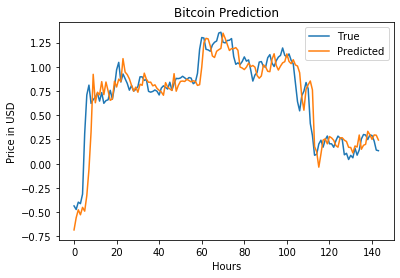

In [20]:
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 3744.0387791038197
MAE: 38.33460570800634


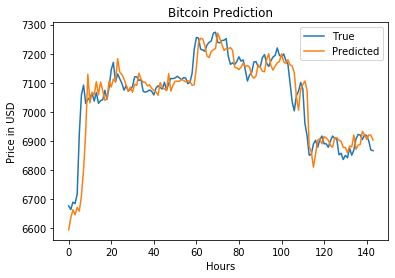

In [21]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test * std) + mean
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

### Applying LSTM

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X.values, y.values, shuffle=False, test_size=0.2)

In [23]:
X_train2 = X_train2.reshape(X_train2.shape[0], 2, 1)
X_test2 = X_test2.reshape(X_test2.shape[0], 2, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model1 = Sequential()
model1.add(LSTM(30, input_shape=(2,1), return_sequences=True))
model1.add(LSTM(30))
model1.add(Dense(1, activation='relu'))

model1.compile(optimizer="adam", loss="mean_squared_error")

model1.fit(X_train2, y_train2, epochs=50)

model1.evaluate(X_test2, y_test2)

Epoch 1/50
573/573 [==============================] - 2s 3ms/step - loss: 1.0359
Epoch 2/50
573/573 [==============================] - 0s 559us/step - loss: 0.9575
Epoch 3/50
573/573 [==============================] - 0s 568us/step - loss: 0.8756
Epoch 4/50
573/573 [==============================] - 0s 501us/step - loss: 0.8098
Epoch 5/50
573/573 [==============================] - 0s 527us/step - loss: 0.7826
Epoch 6/50
573/573 [==============================] - 0s 587us/step - loss: 0.7665
Epoch 7/50
573/573 [==============================] - 0s 623us/step - loss: 0.7579
Epoch 8/50
573/573 [==============================] - 0s 796us/step - loss: 0.7524
Epoch 9/50
573/573 [==============================] - 0s 510us/step - loss: 0.7470
Epoch 10/50
573/573 [==============================] - 0s 485us/step - loss: 0.7425
Epoch 11/50
573/573 [==============================] - 0s 463us/step - loss: 0.7390
Epoch 12/50
573/573 [==============================] - 0s 539us/step - loss: 0.7365
Epo

0.029969512795408566

MSE: 0.02996951111593402
MAE: 0.11710301798005059


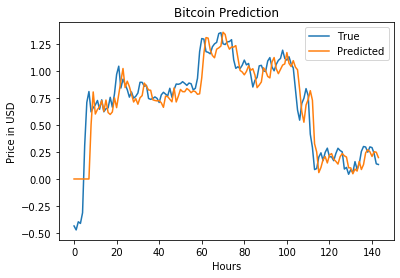

In [25]:

y_pred3 = model1.predict(X_test2)
y_pred3
print('MSE:', mean_squared_error(y_test2, y_pred3))
print('MAE:', mean_absolute_error(y_test2, y_pred3))

plt.plot(y_test2, label='True')
plt.plot(y_pred3, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 3325.7961334940173
MAE: 39.01001172742048


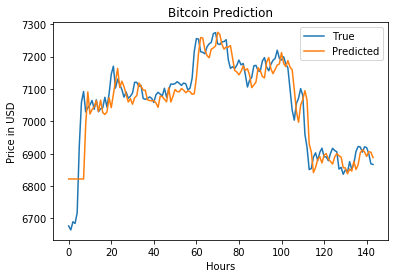

In [26]:
y_pred_org1 = (y_pred3 * std) + mean
y_test_org1 = (y_test2 * std) + mean
print('MSE:', mean_squared_error(y_test_org1, y_pred_org1))
print('MAE:', mean_absolute_error(y_test_org1, y_pred_org1))
plt.plot(y_test_org1, label='True')
plt.plot(y_pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 0.014798939374946555
MAE: 0.07711246204739329


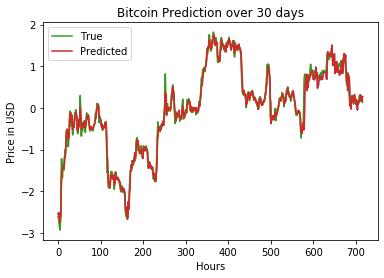

In [27]:
# On Random Forest 
pred = reg.predict(X)
plt.plot(pred)
plt.plot(y)
print('MSE:', mean_squared_error(y, pred))
print('MAE:', mean_absolute_error(y, pred))
plt.plot(y, label='True')
plt.plot(pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction over 30 days')
plt.legend()

MSE: 1642.2783683935768
MAE: 25.688140045563486
Wall time: 23.8 ms


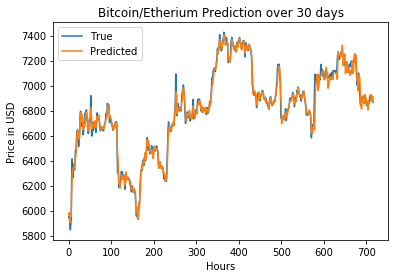

In [30]:
%%time
pred_org1 = (pred * std) + mean
y_org1 = (y * std) + mean
print('MSE:', mean_squared_error(y_org1, pred_org1))
print('MAE:', mean_absolute_error(y_org1, pred_org1))
plt.plot(y_org1, label='True')
plt.plot(pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin/Etherium Prediction over 30 days')
plt.legend()
